In [1]:
"""
OBJETIVO : Visualizar un dato de precipitacion en el mapa
NOTA: Solo se puede graficar los canales infrarojos (C07 +)
            
"""
Autor='Diego Paredes'

In [2]:
# Graficar imagenes
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
import cartopy.feature as cf

# Manejo de imagenes
import pandas as pd
import GOES
import numpy as np
from netCDF4 import Dataset, num2date

In [3]:
"""
DEFINIMOS EL PATH DEL PROYECTO 
"""
with open('../../path_base.txt') as f:
    path_base = f.read()
path_base

'C:/Users/Shounen/Desktop/Ciclo XI/Tesis 2/NewTesis'

In [4]:
"""
Variables generales
"""
path_imagenes = 'F:/GOES/'          

#Variables generales
products = ['C07','C08','C13']
times   = ['10','20','30','40','50','00']

In [5]:
# Grafica la imagen satelital usando longitudes, latitudes, y los valores CMI. 
# Si se le entrega un punto (posLon,posLat), agregara un punto rojo
def dibujarMapa(lons,lats,field,mersh=0,point=[]):    
    if mersh:
        lons, lats = np.meshgrid(lons, lats)  
    else:
        field = field
    
    # Realiza el grafico  
    fig = plt.figure('ABI', figsize=(4,4), dpi=150)
    ax = fig.add_axes([0.1,0.1,0.8,0.8], projection=ccrs.PlateCarree())
    ax.add_feature(cf.COASTLINE)
    ax.add_feature(cf.BORDERS)
    img = ax.pcolormesh(lons, lats, field, cmap=plt.cm.Greys, transform=ccrs.PlateCarree())
    #img = ax.pcolormesh(lons, lats, field, vmin=200, vmax=300, transform=ccrs.PlateCarree())                
    plt.colorbar(img) 
    
    if point:             
        plt.plot(lons[point[0]],lats[point[1]],'ro')        
        
    plt.show()       
    return 

In [6]:
#Como input (imagenFile) recibe un string que es el nombre del archivo de una imagen satelital (.nc),
# devuelve la matriz que representa esta imagen numpy.array(1200,950)
# Si imprimir = 1, va dibujar la imagen satelital
# En el parametro p, se puede inddicar un punto.
# P tiene 3 valores (punto + margen), el margen servirá para recortar la imagen antes de dibujar.
def getMapFile(imagenFile,mersh=0,imprimir=0,p=[]):
    try:
        ds = Dataset(imagenFile)      
    except:
        print("No se pudo leer los archivos de imagen")
        print(imagenFile)
        return -1,-1

    # convierte el formato de la variable de Int16 a Float32 y guarda el resultado
    field = ds.variables['CMI'][:].data.astype(np.int16)/100.0

    # obtiene las coordenadas de los pixeles
    lons = ds.variables['longitude'][:].data
    lats = ds.variables['latitude'][:].data
    date = num2date(ds.variables['time'][:], ds.variables['time'].units, only_use_cftime_datetimes=False, only_use_python_datetimes=True)
    margen = int(p[2])
    if imprimir:    
        dibujarMapa(lons,lats,field,mersh,point=p)
        dibujarMapa(lons[p[0]-margen:p[0]+margen],
                    lats[p[1]-margen:p[1]+margen],
                    field[p[1]-margen:p[1]+margen,p[0]-margen:p[0]+margen],mersh,point=[])
        
    # Solo devuele la parte cortada        
    return lons[p[0]-margen:p[0]+margen],lats[p[1]-margen:p[1]+margen],field[p[1]-margen:p[1]+margen,p[0]-margen:p[0]+margen]          

In [7]:
# Se le indica la fecha, las cordenadas (point,margen), el canal (C13,C07,C08) y el tiempo (min 00,10,20,30,40,50) a dibujar
def visualizarDato(fecha, point=[], canal='C13', tiempo='00', imprimir=1):    
    year, month, day, hour = fecha.split('-')    
    # Encontramos el file
    if year=='2020':
        fileImagen = f'D:/GOES/{canal}/{year}/{month}/G16_{canal}_Cyl_{year}{month}{day}-{hour}{tiempo}.nc'
    else:
        fileImagen = f'F:/GOES/{canal}/{year}/{month}/G16_{canal}_Cyl_{year}{month}{day}-{hour}{tiempo}.nc'
        
    l,t,f = getMapFile(fileImagen,imprimir=imprimir,p=point)    
    return l,t,f

In [12]:
fileDataset = f'{path_base}/Archivos/Inicial/dsCompletoPP_V2.csv'        
df = pd.read_csv(fileDataset)
df.head(2)

,nombre,codigo,XO,XA,longitud,latitud,altura,dato,90%,99%,75%,umb1,umb2,fecha,flag,flagV2,imagen
0,CASAPALCA,472D73C2,406,722,-76.23333,-11.63806,4233.0,0.1,0.1,2.1,0.0,3.1,5.3,2021-03-09-07,C0000002,D01,406--722--2021-03-09-07
1,EL TAMBO,47E0A2A8,269,497,-78.70694,-7.57417,700.0,0.0,0.0,0.2,0.0,0.6,2.6,2021-12-07-19,C0000002,C01,269--497--2021-12-07-19


In [13]:
df[df['dato']==0]

,nombre,codigo,XO,XA,longitud,latitud,altura,dato,90%,99%,75%,umb1,umb2,fecha,flag,flagV2,imagen
1,EL TAMBO,47E0A2A8,269,497,-78.70694,-7.57417,700.0,0.0,0.0,0.200,0.0,0.6,2.6,2021-12-07-19,C0000002,C01,269--497--2021-12-07-19
7,CASCABAMBA,472C92CA,268,486,-78.72682,-7.38407,3390.0,0.0,0.0,1.700,0.0,5.6,13.0,2021-12-06-14,C0000002,C01,268--486--2021-12-06-14
10,GUZMANGO,472C81BC,258,486,-78.90330,-7.38133,2464.0,0.0,0.0,1.600,0.0,4.0,11.7,2021-12-07-03,C0000002,C01,258--486--2021-12-07-03
11,LA FORTUNA,107131,286,502,-78.40242,-7.67042,3343.0,0.0,0.4,5.275,0.0,8.9,17.9,2021-12-08-00,C0000002,C01,286--502--2021-12-08-00
16,CAPACHIQUE,472EB1D2,291,513,-78.31184,-7.85642,2904.0,0.0,0.0,1.200,0.0,5.0,8.7,2021-12-31-10,C0000002,C01,291--513--2021-12-31-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50062,SAN PABLO,4729658E,607,799,-72.61992,-13.02506,1237.0,0.0,0.0,1.600,0.0,2.6,6.9,2021-12-10-03,M0000002,C01,607--799--2021-12-10-03
50069,COSPAN,472D4658,278,489,-78.54106,-7.42856,2423.0,0.0,0.1,2.747,0.0,4.3,8.4,2021-12-05-04,C0000002,C01,278--489--2021-12-05-04
50070,CASCABAMBA,472C92CA,268,486,-78.72682,-7.38407,3390.0,0.0,0.0,1.700,0.0,5.6,13.0,2021-12-31-08,C0000002,C01,268--486--2021-12-31-08
50072,CASCAS,472EA2A4,262,492,-78.82367,-7.47987,1251.0,0.0,0.0,0.200,0.0,0.8,2.5,2021-12-02-15,C0000002,C01,262--492--2021-12-02-15


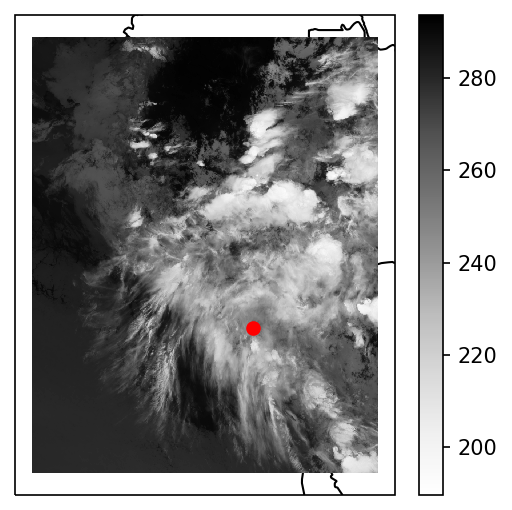

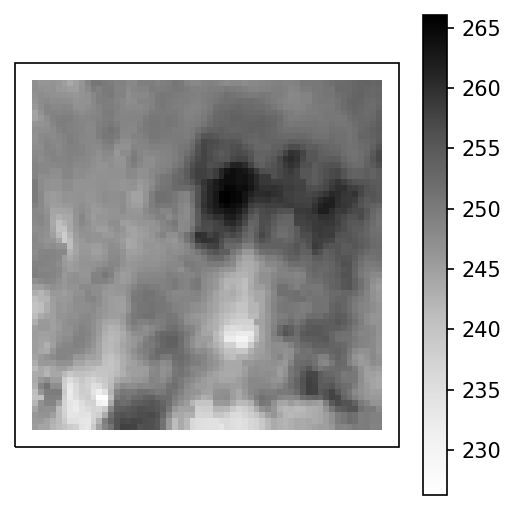

266.05

In [17]:
# Dato de 0 mm/h
xlon,ylat = 607,799# 269,497
fecha = '2021-12-10-03'
margen= 30

_,_,field1 = visualizarDato(fecha, point=[xlon,ylat,margen], canal='C13', tiempo='00',imprimir=1)
field1.max()

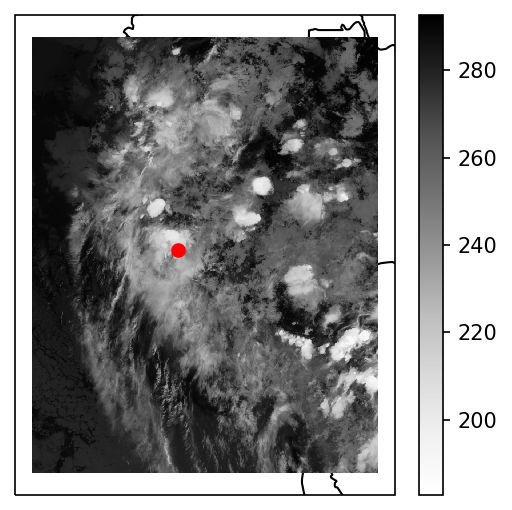

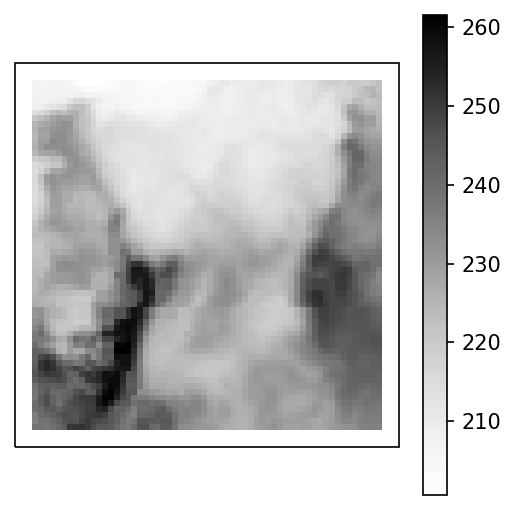

261.5

In [9]:
# Dato de 20 mm/h
xlon,ylat = 400,586
margen= 30 

_,_,field10 = visualizarDato('2021-12-05-04', point=[xlon,ylat,margen], canal='C13', tiempo='00',imprimir=1)
field10.max()